# The GD and SGD algorithms
#### sources : 
- https://machinelearnia.com/descente-de-gradient/
- https://medium.com/@lope.ai/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a


### Linear regression lines are affine functions that can be written in the form: $ \ \ \ \ \ f(x^{(i)})=a.x^{(i)}+b $ 
### and can be written as a matrix product: $ F = X.\theta $ 
### where $ \ \ \ X = \begin{vmatrix} x^{(1)} & 1 \\ ... &  ...\\ x^{(m)} & 1 \end{vmatrix}$, &nbsp; $\theta = \begin{vmatrix} a \\ b \end{vmatrix}$ &nbsp; and &nbsp; $F = \begin{vmatrix} f(x^{(1)}) \\ ... \\ f(x^{(m)}) \end{vmatrix}$

### The cost function that we will use for gradient descent is written as: &emsp;&emsp; $ J(a,b) = \frac{1}{2m} \sum_{i=1}^{m} (a.x^{(i)}+b-y^{(i)})^2$

### This cost function is literally the sum of squared errors (MSE), that is, the difference between the model and the data (the model is a line when there is 1 explanatory variable, a plane for 2 variables, an "hyperplane" when the number of variables is > 3). <br></br>

### It can be written in matrix form as: &emsp;&emsp; $ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (X.\theta-Y)^2$
### where $Y = \begin{vmatrix} y^{(1)} \\ ... \\ y^{(m)} \end{vmatrix}$

### Now, by computing the partial derivatives of  $J$ :
### $\left\{\begin{matrix} \frac{\partial J(a,b)}{\partial a} = \frac{1}{m} \sum x(a.x+b-y) \\ \frac{\partial J(a,b)}{\partial b} = \frac{1}{m} \sum 1(a.x+b-y)  \end{matrix}\right.$ <br> </br>
### $ \frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}.X^{T}(X.\theta - Y)$ &emsp; in matrix notation <br></br> 

# 1 - Gradient Descent with 1 variable, simple linear regression

## Simple example to begin with

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from tqdm import tqdm

## 1.1 - Scatter plot of a variable with linear trend (generated with make_regression)

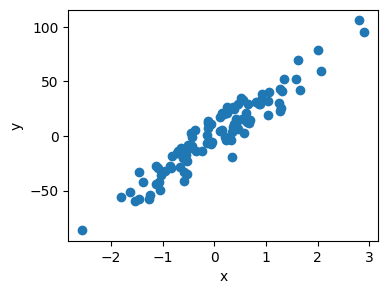

In [3]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.figure(figsize=(4,3))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
print(x.shape)
print(y.shape)
y = y.reshape(y.shape[0],1)
print(y.shape) #on arrange le vecteur y pour avoir les bonnes dimensions

(100, 1)
(100,)
(100, 1)


In [5]:
# matrice X
X = np.hstack((x, np.ones(x.shape))) #stack : on 'colle' les vecteurs
X[:10] #la matrice contient en 1ere colonne les valeurs de x (dimension Nx1), en deuxième colonne le vecter unité (Nx1)
# la matrice est de dimension (Nx2)

array([[ 2.79606062,  1.        ],
       [ 1.35299008,  1.        ],
       [-0.60446394,  1.        ],
       [ 0.54352288,  1.        ],
       [-0.70219544,  1.        ],
       [-0.58514697,  1.        ],
       [-0.84277742,  1.        ],
       [-0.53177508,  1.        ],
       [-0.42924651,  1.        ],
       [-0.52962535,  1.        ]])

In [6]:
# on créer le vecteur theta qu'on va initialiser avec des paramètres aléatoires
theta = np.random.randn(2,1) # (2,1) sont les dimensions de theta
theta

array([[-2.16397762],
       [ 1.29677132]])

## 1.2 - The model is an affine function

In [7]:
def model(X,theta):
    return X.dot(theta)

model(X,theta).shape #10 premieres "prédictions" du modèle en se basant sur une droite affine aux coefficients aléatoire (très mauvaises prédictions donc)

(100, 1)

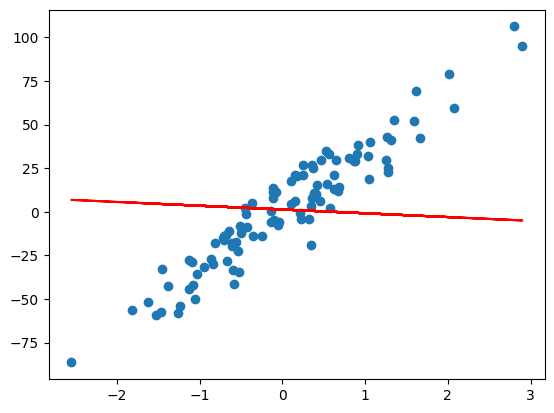

In [8]:
plt.scatter(x, y)
plt.plot(x,model(X,theta), c='r')
plt.show()

### **Note** : We took random a,b coefficients and plotted the affine function $y=a*x+b$ (red line) on top of the scatter plot. We didn't use any algorithm yet in order to find the best (a,b) that minimize the quadratic distance between all the data and our model

### **Commentaire** : là concrètement on a prit des coefficients a,b au pif et on a tracé la droite affine $y=a*x+b$ (droite rouge) par rapport au nuage de points. On a pas encore mis en place l'algorithme de descente de gradient qui va progressivement chercher le couple (a,b) qui minimise les écarts quadratique entre chaque droite générée (par le couple (a,b) et le nuage de points)

## 1.3 - Loss function $J(\theta)$

In [10]:
def cost_function(X, y, theta):
    m = len(y) #nombre de points du dataset
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [12]:
print(cost_function(X,y,theta), '\n....wair for it')


649.479333158913 
....wair for it


### On voit bien que notre droite affine rouge donne un coût très élevé (on veut se rapprocher de 0). Normal, aucun algo d'utilisé pour l'instant. La droite a été générée aléatoirement

## 1.4 - GD & SGD algorithms

#### $\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}.X^{T}(X.\theta - Y)$

In [13]:
# Gradients calculation
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [14]:
# R2 Coefficient of determination
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

## algorithm : $\theta:= \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}$ &rarr; with two variables : $\left\{\begin{matrix} a:=a-\alpha\frac{\partial J(a,b)}{\partial a} \\ b:=b-\alpha\frac{\partial J(a,b)}{\partial b} \end{matrix}\right.$

In [15]:
# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    R2_history = np.zeros(n_iterations)
    for i in tqdm(range(0,n_iterations)):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X,y,theta)
        R2_history[i] = coef_determination(y,model(X,theta))
    return theta, cost_history, R2_history

In [16]:
# OPTION 2 : Stochastic Gradient Descent

In [17]:
def stochastic_gradient_descent(X, y, learning_rate=.1, num_epochs=10, batch_size=50, print_epochs=True, plot=True, plot_size=(8,3)):
    num_batches = X.shape[0] // batch_size
    cost_history = np.zeros(num_epochs)
    R2_history = np.zeros(num_epochs)
    
    theta = np.random.randn(X.shape[1],1) 
    
    for epoch in tqdm(range(num_epochs)):
        
        epoch_cost = 0
        
        for batch in range(num_batches):
            
            # select a random batch in data:
            batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            
            # calculate the cost function
            batch_cost = cost_function(X_batch, y_batch, theta)
            epoch_cost += batch_cost
            
            # update new theta values 
            theta = theta - learning_rate * grad(X_batch, y_batch, theta)
        
        
        # Print the cost and R2 for this epoch
        cost = cost_function(X, y, theta)
        R2 = coef_determination(y, model(X, theta))
        if print_epochs:
            print(f'Epoch {epoch} - loss : {cost:.4f} - R2 : {R2:.4f}')
        
        # calculate the cost and R2 for the entire set of data
        cost_history[epoch] = cost
        R2_history[epoch] = R2
        
    if plot:
        plt.figure(figsize=plot_size)
        plt.subplot(121)
        plt.plot(cost_history)
        plt.title(f'Fonction coût')
        plt.annotate(f'J min: {round(cost,2)}',xy=(num_epochs,round(cost,2)),xytext=(num_epochs*0.7,0.2*max(cost_history)),
                     c='b',arrowprops=dict(arrowstyle= '-|>',color='b',lw=1.5,ls='-'))

        plt.xlabel("epochs")
        plt.subplot(122)
        plt.plot(R2_history)
        plt.annotate(f'R2 max: {R2:.2f}',xy=(num_epochs,round(R2,2)),xytext=(num_epochs*0.7,0.2*min(R2_history)),
                     c='r',arrowprops=dict(arrowstyle= '-|>',color='red',lw=1.5,ls='-'))
        plt.title('R2')
        plt.xlabel("epochs")
        plt.show()
    
    return theta, cost_history, R2_history
            

### On récupère ici 3 données de la descente de gradient 
### (les variables de la droite de régression $\theta$, les valeurs de la fonction coût $J$, les coefficients de déterminations R2): 

In [19]:
# GD
theta_final, cost, R2 = gradient_descent(X, y, theta,
                               learning_rate=0.1,
                               n_iterations=100)
# SGD
theta_sgd, cost_sgd, R2_sgd = stochastic_gradient_descent(X, y, plot=False, learning_rate=.1, num_epochs=100,batch_size=64, print_epochs=False)

100%|██████████| 100/100 [00:00<00:00, 6193.87it/s]


In [22]:
print("final values of theta :")
print(f"with GD : {np.round(theta_final.T,4)}")
print(f"with SGD : {np.round(theta_sgd.T,4)}")

final values of theta :
with GD : [[33.0335  0.8198]]
with SGD : [[33.0838  0.9821]]


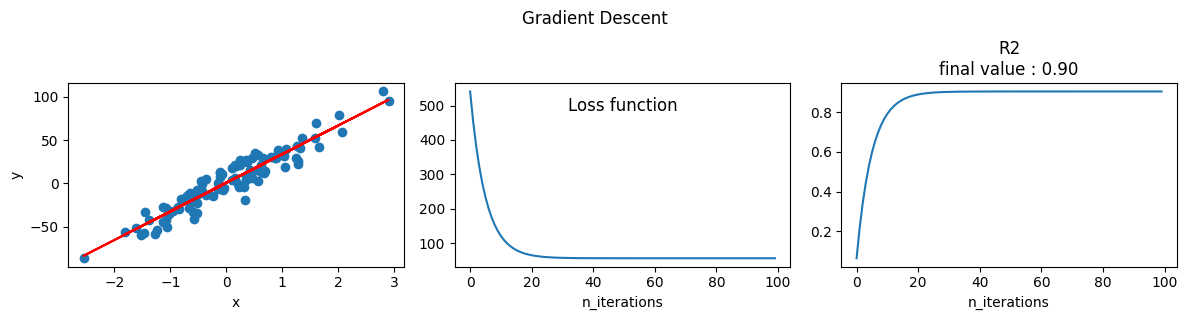

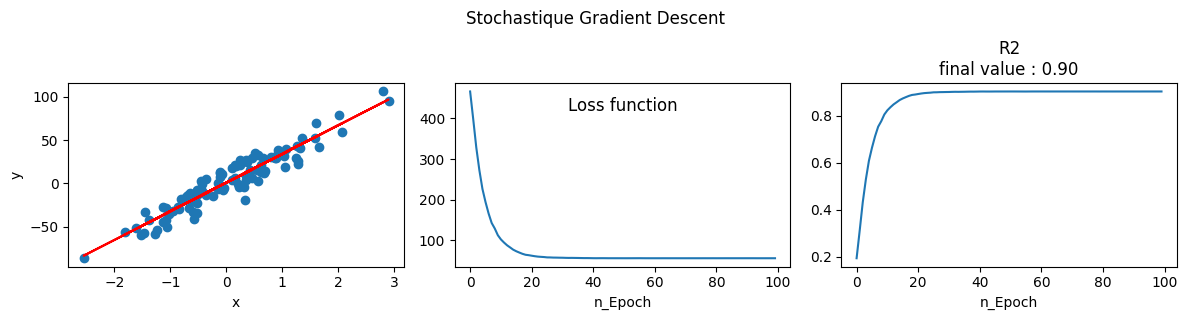

In [23]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,X.dot(theta_final),c='r')
plt.subplot(132)
plt.plot(range(len(cost)),cost)
plt.title('Loss function', y=.8)
plt.xlabel('n_iterations')
plt.subplot(133)
plt.plot(range(len(R2)),R2)
plt.title(f'R2\nfinal value : {R2[-1]:.2f}')
plt.xlabel('n_iterations')
plt.tight_layout()
plt.suptitle('Gradient Descent', y=1.05)
plt.show()

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,X.dot(theta_sgd),c='r')
plt.subplot(132)
plt.plot(range(len(cost_sgd)),cost_sgd)
plt.title('Loss function', y=.8)
plt.xlabel('n_Epoch')
plt.subplot(133)
plt.plot(range(len(R2_sgd)),R2_sgd)
plt.title(f'R2\nfinal value : {R2_sgd[-1]:.2f}')
plt.xlabel('n_Epoch')
plt.tight_layout()
plt.suptitle('Stochastique Gradient Descent', y=1.05)
plt.show()

### **Remarque :** ce coef R2 est calculé sur l'ensemble des points d'un jeu de donnée que l'on a crée aléatoirement.Il est "le meilleur possible" au regard des données de base. Si l'on devait prédire des valeurs y à partir d'un échatillon de données x_test, il faudrait recalculer ce R2 (simplement applicuer la fonction coef_determination sur x_test).

# 2 - Gradient Descent with 2 variables, multiple linear regression

## 2.1 - Random data with a linear trend (make_regression)

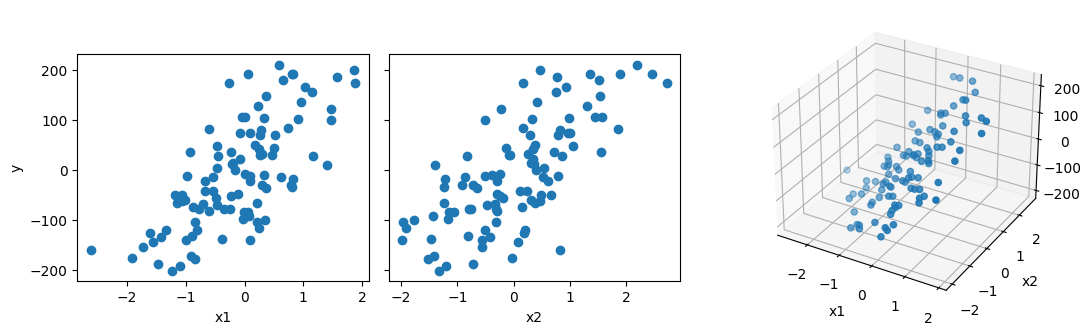

In [25]:
x, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

#fig = plt.figure()

fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(7,3), sharey=True)
ax1.scatter(x[:,0],y)
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

ax2.scatter(x[:,1],y)
ax2.set_xlabel('x2')

fig1.tight_layout()

fig3 = fig1.add_subplot(1,3,(3,4), projection='3d')
fig3.scatter(x[:,0], x[:,1], y)
fig3.set_xlabel('x1')
fig3.set_ylabel('x2')
fig3.set_position(pos=[.3, 0.1, 2,1])
plt.show()

### with 2 variables, the loss function is given by : &emsp;&emsp; $J(a,b,c) = \frac{1}{2m} \sum_{i=1}^{m} (a.x_1^{(i)}+b.x_2^{(i)}+c-y^{(i)})^2$


In [26]:
print(x.shape)
print(y.shape)
# redimensionner y
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 2)
(100,)
(100, 1)


In [27]:
# matrice X
X = np.hstack((x,np.ones((x.shape[0],1))))
print(X.shape)
print(X[:10])

(100, 3)
[[-1.1913035   0.65655361  1.        ]
 [ 0.05820872 -1.1429703   1.        ]
 [ 0.58685709  2.19045563  1.        ]
 [ 0.47323762 -0.07282891  1.        ]
 [ 0.73846658  0.17136828  1.        ]
 [-0.88951443 -0.81581028  1.        ]
 [-1.91877122 -0.02651388  1.        ]
 [-0.44651495  0.85639879  1.        ]
 [ 0.81252582  1.35624003  1.        ]
 [ 1.14282281  0.75193303  1.        ]]


### On déroule la même logique

In [28]:
# variables de theta initialisées aléatoirement
theta = np.random.randn(3,1) # (2,1) sont les dimensions de theta
theta

array([[ 0.62433712],
       [-1.44396649],
       [-0.38060951]])

In [29]:
theta_final, cost, R2 = gradient_descent(X, y, theta,
                               learning_rate=0.01,
                               n_iterations=1000)

100%|██████████| 1000/1000 [00:00<00:00, 20493.11it/s]


In [30]:
theta_final

array([[85.93814794],
       [74.1203331 ],
       [ 0.1930565 ]])

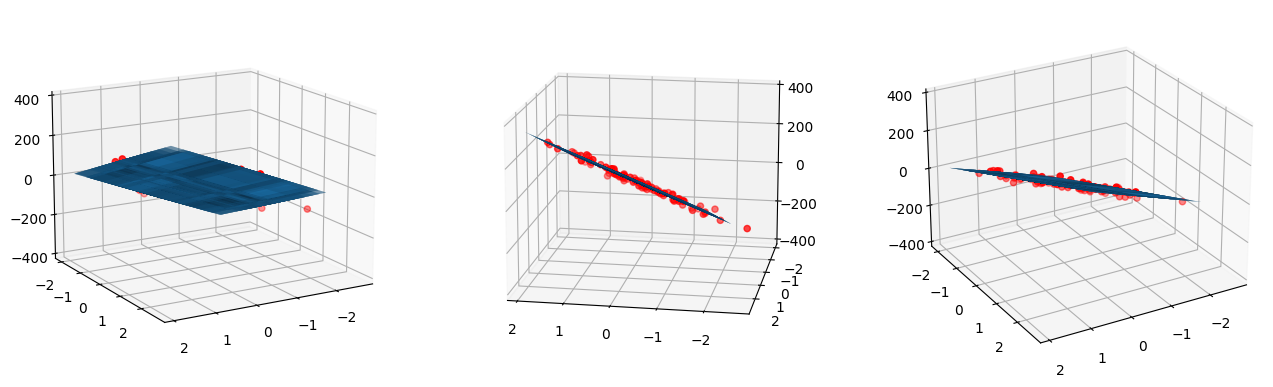

In [35]:
X1,X2 = np.meshgrid(x[:,0],x[:,1])

fig = plt.figure(figsize=(16,6))
# --- first subplot 3D ---
ax1 = fig.add_subplot(131,projection='3d')
surf1 = ax1.plot_surface(X1, X2, 
                theta_final[0]*X1+theta_final[1]*X2+theta_final[2],
                alpha=0.2)
ax1.scatter(x[:,0],x[:,1],y, c='r')
ax1.view_init(15,60)
# --- 
ax2 = fig.add_subplot(132,projection='3d')
surf2 = ax2.plot_surface(X1, X2, 
                theta_final[0]*X1+theta_final[1]*X2+theta_final[2],
                alpha=0.2)
ax2.scatter(x[:,0],x[:,1],y, c='r')
ax2.view_init(15,100)
# ---
ax3 = fig.add_subplot(133,projection='3d')
surf3 = ax3.plot_surface(X1, X2, 
                theta_final[0]*X1+theta_final[1]*X2+theta_final[2],
                alpha=0.2)
ax3.scatter(x[:,0],x[:,1],y, c='r')
ax3.view_init(25,60)

plt.show()


### 3D-interactive graph with Plotly

In [36]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)

Z = theta_final[0] * xx0 + theta_final[1] * xx1 + theta_final[2]

fig = (go.Figure(data=[go.Surface(z=Z, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))
fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))
fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0), width=800, height=400)
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

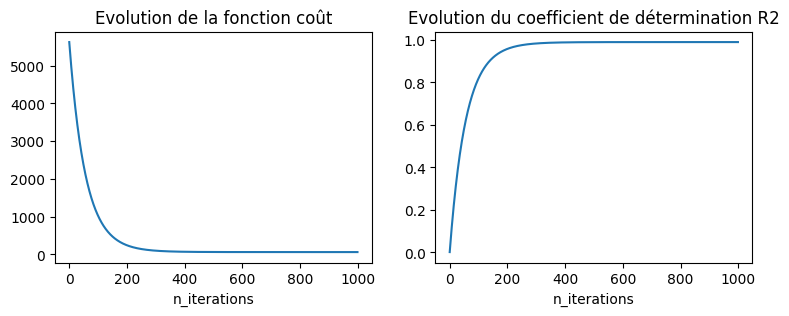

In [33]:
plt.figure(figsize=(9,3))
plt.subplot(121)
plt.plot(range(len(cost)),cost)
plt.title('Evolution de la fonction coût')
plt.xlabel('n_iterations')
plt.subplot(122)
plt.plot(range(len(R2)),R2)
plt.title('Evolution du coefficient de détermination R2')
plt.xlabel('n_iterations')
plt.show()

In [34]:
print('R2 à la dernière itération',round(R2[-1],2)) 
print('Valeur de la fonction coût à la dernière itération', round(cost[-1],2))

R2 à la dernière itération 0.99
Valeur de la fonction coût à la dernière itération 57.51


## 2.2 - Let's split the data (train/test)

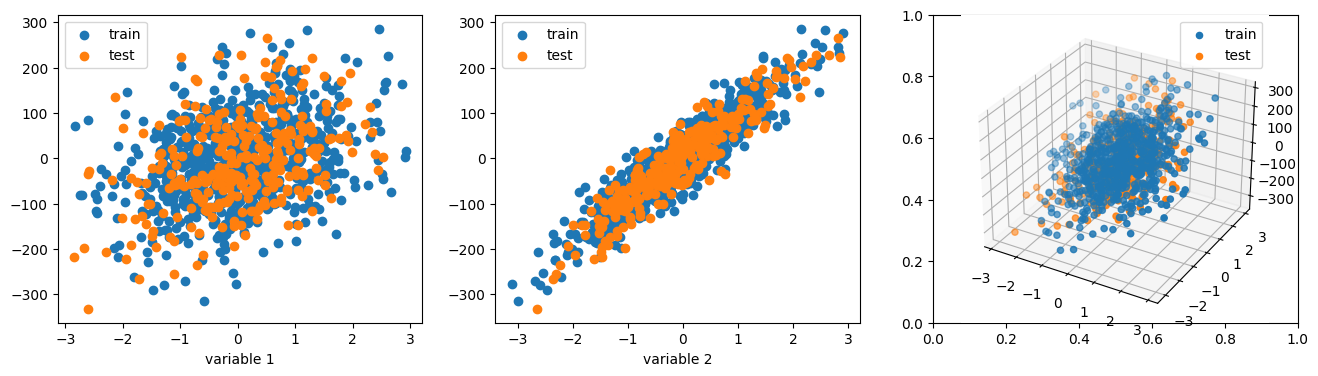

In [38]:
from sklearn.model_selection import train_test_split
x, y = make_regression(n_samples=1000, n_features=2, noise=10)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=7)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
ax1.scatter(X_train[:,0],y_train,label='train')
ax1.scatter(X_test[:,0],y_test,label='test')
ax1.set_xlabel('variable 1')
ax1.legend()
ax2.scatter(X_train[:,1],y_train,label='train')
ax2.scatter(X_test[:,1],y_test,label='test')
ax2.set_xlabel('variable 2')
ax2.legend()

ax3 = fig.add_subplot(1,3,3,projection='3d')
ax3.scatter(X_train[:,0], X_train[:,1], y_train,label='train')
ax3.scatter(X_test[:,0], X_test[:,1], y_test,label='test')
ax3.legend()
plt.show()

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# redimensionner y
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

print(y_train.shape)
print(y_test.shape)

(700, 2)
(300, 2)
(700,)
(300,)
(700, 1)
(300, 1)


In [40]:
X_train_stacked = np.hstack((X_train,np.ones((X_train.shape[0],1))))
X_test_stacked = np.hstack((X_test,np.ones((X_test.shape[0],1))))

print(X_train_stacked.shape)
print(X_train_stacked[:10])
print(X_test_stacked.shape)
print(X_test_stacked[:10])

(700, 3)
[[ 0.27997251  0.22833767  1.        ]
 [ 1.20622866  0.88041335  1.        ]
 [-0.98758382  2.42577826  1.        ]
 [-0.75242297  0.04823679  1.        ]
 [-0.87082067  0.69885039  1.        ]
 [-2.82900163  1.70787698  1.        ]
 [-1.67510012 -1.14469734  1.        ]
 [-0.35519213  1.16914857  1.        ]
 [ 0.67837978  1.92560315  1.        ]
 [-1.11613173 -0.44933919  1.        ]]
(300, 3)
[[-0.32631875  0.12899602  1.        ]
 [ 1.80476216  0.44315439  1.        ]
 [ 2.53681434 -0.79297325  1.        ]
 [-1.47714369 -1.19527628  1.        ]
 [-0.50644535 -1.07275913  1.        ]
 [-0.1978642   0.3378715   1.        ]
 [ 0.33188696 -1.53278013  1.        ]
 [-0.3403275   0.54500962  1.        ]
 [-0.01474557 -0.84709296  1.        ]
 [ 0.74682253  0.5249339   1.        ]]


In [30]:
theta = np.random.randn(3,1) # (2,1) sont les dimensions de theta
theta

array([[-0.78883431],
       [ 1.64771536],
       [-0.11008473]])

In [41]:
theta_final, cost, R2 = gradient_descent(X_train_stacked, y_train, theta,
                               learning_rate=0.01,
                               n_iterations=1000)

100%|██████████| 1000/1000 [00:00<00:00, 18265.17it/s]


In [42]:
theta_final # coefficients qui définissent le plan de régression

array([[ 3.35607811e+01],
       [ 9.14797238e+01],
       [-2.77651888e-02]])

In [43]:
y_pred = model(X_test_stacked,theta_final)

In [44]:
coef_determination(y_test,y_pred)

0.9907932515292556

## 2.3 - Let's compare the results with the use of sklearn LinearRegression Model:

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [48]:
print(f'slope coefficients calculated with sklearn : {lr.coef_}, intercept value: {lr.intercept_}')
print(f'slope coefficients calculated with our gradient descent: {theta_final[0:2].T}, intercept value : {theta_final[2]}')

slope coefficients calculated with sklearn : [[33.56211704 91.48515928]], intercept value: [-0.02651019]
slope coefficients calculated with our gradient descent: [[33.56078107 91.47972376]], intercept value : [-0.02776519]


In [49]:
lr.score(X_test,y_test) #

0.9907940375080803

# 3 - Example with a Kaggle Dataset
### source: https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset

## 3.1 - Let's take only 2 features first (so we'll be able to plot our data, and the surface models)

In [227]:
import pandas as pd

df = pd.read_csv('bodyfat.csv')

In [59]:
# Check of the p-values between the target : "bodyfat" and the features

from statsmodels.api import OLS, add_constant

x = df.drop('BodyFat', axis=1)
y = df['BodyFat']

linreg = LinearRegression().fit(x, y)
ols = OLS(y, add_constant(x)).fit()

coefs = pd.DataFrame({
    "coefficent": pd.Series(linreg.coef_, index = x.columns),
    "p_value":  pd.Series(ols.pvalues, index = ols.pvalues.index[1:])})

coefs.applymap(lambda x: (x))\
    .style.applymap(lambda x: 'color: red' if round(x,2) == 0 else 'color: black', subset=pd.IndexSlice[:, ['p_value']])

,coefficent,p_value
Density,-411.237849,0.000000
Age,0.012587,0.192288
Weight,0.010054,0.529479
Height,-0.007981,0.779276
Neck,-0.028456,0.682061
Chest,0.026780,0.362685
Abdomen,0.018565,0.559318
Hip,0.019166,0.659369
Thigh,-0.016758,0.697278
Knee,-0.004639,0.948412


In [60]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [61]:
df.shape

(252, 15)

In [62]:
x = df.loc[:,['Weight','Height']].astype(float)
y = df.loc[:,'BodyFat'].astype(float)

In [46]:
#x['Age'].astype(float)

In [63]:
print(x.dtypes,y.dtypes)

Weight    float64
Height    float64
dtype: object float64


## Normalizing the data
(en m'inspirant de :https://medium.com/@lope.ai/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a)

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

## We split the data (train/test)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=7)

In [68]:
X_train_stacked = np.hstack((X_train,np.ones((X_train.shape[0],1))))
X_test_stacked = np.hstack((X_test,np.ones((X_test.shape[0],1))))

In [69]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [70]:
print(X_train_stacked.shape, y_train.shape)
y_train = y_train.reshape(y_train.shape[0],1)
print(y_train.shape)

(176, 3) (176,)
(176, 1)


In [71]:
theta = np.random.randn(X_train_stacked.shape[1],1) # les 3 variables + l'ordonnées à l'origine
theta

array([[-0.5355484 ],
       [ 1.56236753],
       [ 0.68565122]])

In [72]:
cost_l, R2_l  = [],[]
N_iter = 1000
eta = 0.01 
theta_final, cost, R2 = gradient_descent(X_train_stacked, y_train, theta,
                            learning_rate=eta,
                            n_iterations=N_iter)


100%|██████████| 1000/1000 [00:00<00:00, 20258.13it/s]


In [75]:
print(f'R2 final value : {R2[-1]}') 
print(f'Loss function final value :{cost[-1]}')

R2 final value : 0.5167466259643394
Loss function final value :18.438463140345107


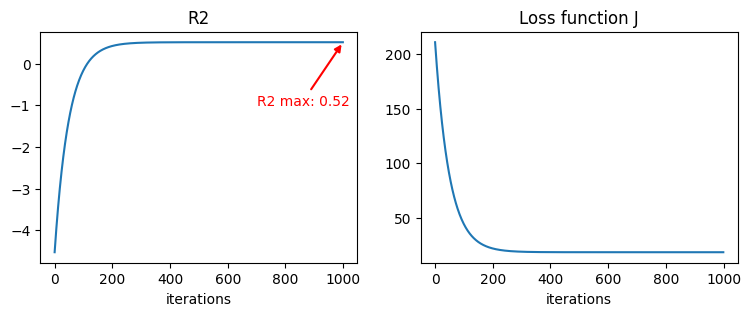

In [79]:
plt.figure(figsize=(9,3))
plt.subplot(121)
plt.plot(range(N_iter),R2)
plt.annotate(f'R2 max: {round(R2[-1],2)}',xy=(N_iter,round(R2[-1],2)),xytext=(N_iter*0.7,-1),c='r',arrowprops=dict(arrowstyle= '-|>',color='red',lw=1.5,ls='-'))
plt.title('R2')
plt.xlabel('iterations')
plt.subplot(122)
plt.plot(range(N_iter),cost)
plt.title('Loss function J')
plt.xlabel('iterations')
plt.show()

In [80]:
theta_final

array([[ 6.07670758],
       [-2.12790903],
       [18.96530922]])

In [81]:
ypred = model(X_test_stacked,theta_final)

In [82]:
print(y_test.shape)
y_test = y_test.reshape(y_test.shape[0],1)
print(y_test.shape)

(76,)
(76, 1)


In [83]:
print(coef_determination(y_test, ypred))

0.2603486970158555


##  3D surfaces (with matplotlib)

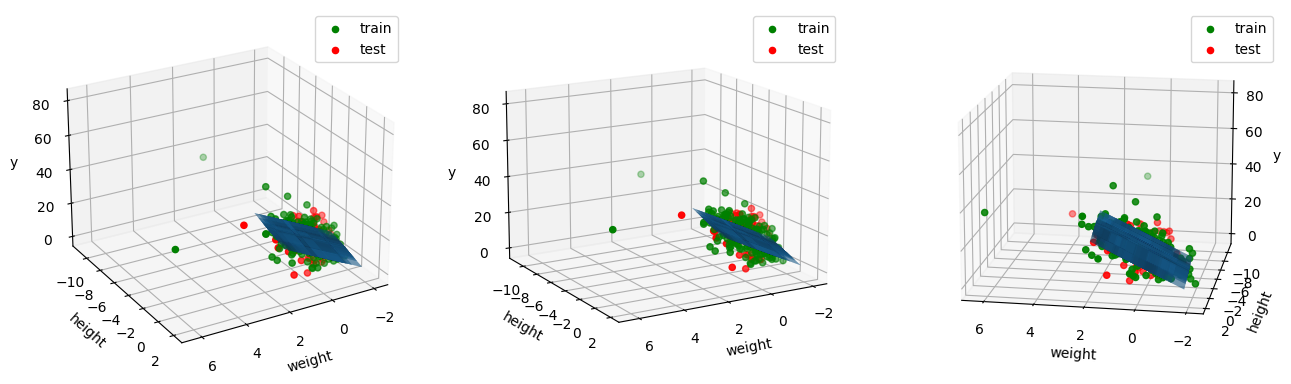

In [85]:
X1,X2 = np.meshgrid(X_train_stacked[:,0],X_train_stacked[:,1])

fig = plt.figure(figsize=(16,6))
# --- first subplot 3D ---
ax1 = fig.add_subplot(131,projection='3d')
surf1 = ax1.plot_surface(X1, X2, 
                theta_final[0]*X1+theta_final[1]*X2+theta_final[2],
                alpha=0.2)
ax1.scatter(X_train_stacked[:,0],X_train_stacked[:,1],y_train, c='g', label='train')
ax1.scatter(X_test_stacked[:,0],X_test_stacked[:,1],y_test, c='r',label='test')
ax1.set(xlabel="weight",ylabel='height',zlabel='y')
ax1.legend()
ax1.view_init(25,60)
# --- 
ax2 = fig.add_subplot(132,projection='3d')
surf2 = ax2.plot_surface(X1, X2, 
                theta_final[0]*X1+theta_final[1]*X2+theta_final[2],
                alpha=0.2)
ax2.scatter(X_train_stacked[:,0],X_train_stacked[:,1],y_train, c='g', label='train')
ax2.scatter(X_test_stacked[:,0],X_test_stacked[:,1],y_test, c='r',label='test')
ax2.set(xlabel="weight",ylabel='height',zlabel='y')
ax2.legend()
ax2.view_init(15,60)
# ---
ax3 = fig.add_subplot(133,projection='3d')
surf3 = ax3.plot_surface(X1, X2, 
                theta_final[0]*X1+theta_final[1]*X2+theta_final[2],
                alpha=0.2)
ax3.scatter(X_train_stacked[:,0],X_train_stacked[:,1],y_train, c='g', label='train')
ax3.scatter(X_test_stacked[:,0],X_test_stacked[:,1],y_test, c='r',label='test')
ax3.legend()
ax3.set(xlabel="weight",ylabel='height',zlabel='y')
ax3.view_init(15,100)

plt.show()


## 3D surfaces with plotly

In [104]:
X_train0 = np.linspace(X_train_stacked[:,0].min(), X_train_stacked[:,0].max(),100)
X_train1 = np.linspace(X_train_stacked[:,1].min(), X_train_stacked[:,1].max(),100)
X_test0 = np.linspace(X_test_stacked[:,0].min(), X_test_stacked[:,0].max(),100)
X_test1 = np.linspace(X_test_stacked[:,1].min(), X_test_stacked[:,1].max(),100)

xx0_tr, xx1_tr = np.meshgrid(X_train0, X_train1)
#xx0_te, xx1_te = np.meshgrid(X_test0, X_test1)
xx0_te, xx1_te = np.meshgrid(X_train0, X_train1) #using the same meshgrid in order to visualize test data with same axis range

Ztr = theta_final[0] * xx0_tr + theta_final[1] * xx1_tr + theta_final[2]
Zte = theta_final[0] * xx0_te + theta_final[1] * xx1_te + theta_final[2]


fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}]], subplot_titles=['Train Data', 'Test Data'])

fig.add_trace(
    (go.Surface(z=Ztr, x=xx0_tr, y=xx1_tr, colorscale='YlOrRd', opacity=.7, reversescale=True, showscale=False)),
    row=1, col=1)
fig.add_scatter3d(x=X_train_stacked[:,0], y=X_train_stacked[:,1], z=y_train.flatten(),
                  mode='markers', marker=dict(size=3, colorscale='YlOrRd', color=y_train.flatten(), reversescale=True),
                  row=1, col=1, name='Train data')

fig.add_trace(
    (go.Surface(z=Zte, x=xx0_te, y=xx1_te, colorscale='YlGnBu', opacity=.7, reversescale=True, showscale=False)),
    row=1, col=2)

fig.add_scatter3d(x=X_test_stacked[:,0], y=X_test_stacked[:,1], z=y_test.flatten(),
                  mode='markers', marker=dict(size=3, colorscale='YlGnBu', color=y_test.flatten(), reversescale=True), 
                  row=1, col=2, name='Test data')

#fig.update_xaxes(title_text="xaxis 1 title",range=[-4,4], row=1, col=2)
m = 40
fig.update_layout(template="plotly_dark", margin=dict(l=m, r=m, b=m, t=m), showlegend=True, width=1200, height=400, 
                  scene=dict(xaxis_title='Width', yaxis_title='Height', zaxis_title='BodyFat'),scene2=dict(xaxis_title='Width', yaxis_title='Height', zaxis_title='BodyFat'))

fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

## 3.2 - Differences with LinearRegression from sklearn ?

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [106]:
lr.score(X_train,y_train)

0.5167466375907517

In [107]:
lr.score(X_test,y_test)

0.2603693439383481

In [111]:
print(f'slope coefficients calculated with sklearn : {lr.coef_}, intercept value: {lr.intercept_}')
print(f'slope coefficients calculated with our gradient descent: {theta_final[0:2].T}, intercept value : {theta_final[2]}')

slope coefficients calculated with sklearn : [[ 6.07725584 -2.12834888]], intercept value: [18.965964]
slope coefficients calculated with our gradient descent: [[ 6.07670758 -2.12790903]], intercept value : [18.96530922]


### --> Same results...it's all good!

In [112]:
cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')

array([0.1737234 , 0.65987628, 0.47599039, 0.249587  , 0.55082322])

## 3.3 - With more than 2 features ?

In [305]:
df.head(3)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6


In [114]:
#x = df.loc[:,['Weight','Height','Neck','Chest']].astype(float)
x = df.drop(['BodyFat'],axis=1).astype(float)
y = df.loc[:,'BodyFat'].astype(float)

In [115]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=7)

X_train_stacked = np.hstack((X_train,np.ones((X_train.shape[0],1))))
X_test_stacked = np.hstack((X_test,np.ones((X_test.shape[0],1))))

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print(X_train_stacked.shape, y_train.shape)
y_train = y_train.reshape(y_train.shape[0],1)
print(y_train.shape)

(176, 15) (176,)
(176, 1)


In [116]:
theta = np.random.randn(X_train_stacked.shape[1],1)
theta.T

array([[-0.25632783, -0.02193137, -0.80893008,  0.61593689, -1.54119119,
         1.35789583,  0.37062926,  0.95400263, -1.3483526 ,  0.11936533,
         0.50582627, -1.00845673, -1.56699488,  0.09190081,  1.06270197]])

In [117]:
cost_l, R2_l  = [],[]
N_iter = 1000
eta = 0.01 
theta_final, cost, R2 = gradient_descent(X_train_stacked, y_train, theta,
                            learning_rate=eta,
                            n_iterations=N_iter)

print(f'R2 à la dernière itération : {R2[-1]}') 
print(f'Valeur de la fonction coût à la dernière itération :{cost[-1]}')

100%|██████████| 1000/1000 [00:00<00:00, 19582.90it/s]

R2 à la dernière itération : 0.970368869821692
Valeur de la fonction coût à la dernière itération :1.1305715199397313


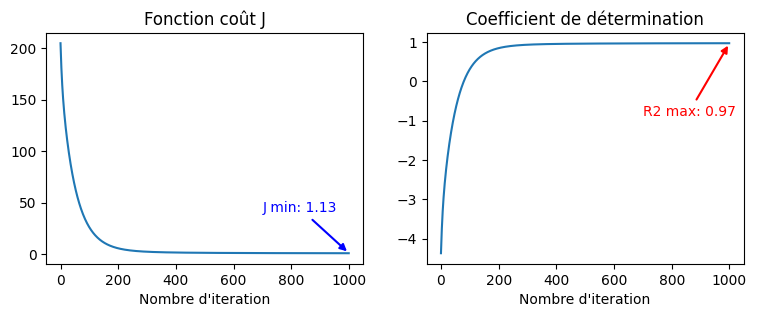

In [118]:
plt.figure(figsize=(9,3))
plt.subplot(122)
plt.plot(range(N_iter),R2)
plt.annotate(f'R2 max: {round(R2[-1],2)}',xy=(N_iter,round(R2[-1],2)),xytext=(N_iter*0.7,0.2*min(R2)),c='r',arrowprops=dict(arrowstyle= '-|>',color='red',lw=1.5,ls='-'))
plt.title('Coefficient de détermination')
plt.xlabel('Nombre d\'iteration')
plt.subplot(121)
plt.plot(range(N_iter),cost)
plt.annotate(f'J min: {round(cost[-1],2)}',xy=(N_iter,round(cost[-1],2)),xytext=(N_iter*0.7,0.2*max(cost)),c='b',arrowprops=dict(arrowstyle= '-|>',color='b',lw=1.5,ls='-'))
plt.title('Fonction coût J')
plt.xlabel('Nombre d\'iteration')
plt.show()

### Stochastique Gradient Descent

100%|██████████| 1000/1000 [00:00<00:00, 6169.87it/s]


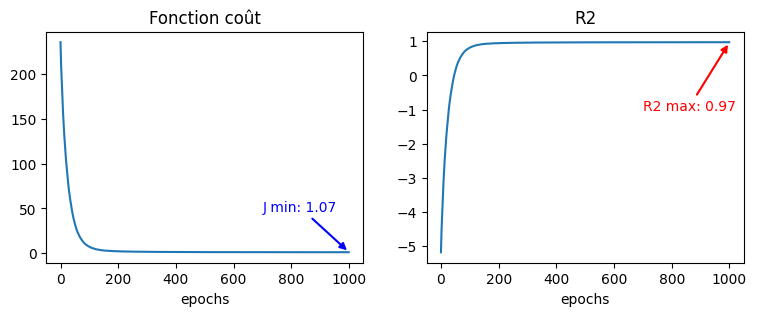

R2 à la dernière itération : 0.9718800316579161
Valeur de la fonction coût à la dernière itération :1.07291335692759


In [119]:
theta_f_sgd, cost_sgd, R2_sgd = stochastic_gradient_descent(X_train_stacked, y_train, learning_rate=0.01, num_epochs=1000, 
                                                            batch_size=64, plot=True, plot_size=(9,3), print_epochs=False)

print(f'R2 à la dernière itération : {R2_sgd[-1]}') 
print(f'Valeur de la fonction coût à la dernière itération :{cost_sgd[-1]}')